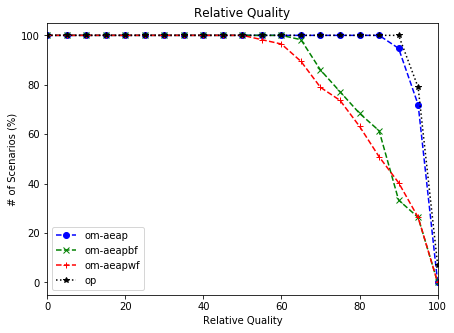

In [30]:
import csv
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DIR_NAME = './flow_size/'
FIG_SIZE = (7, 5)

filenames = os.listdir(DIR_NAME)
filenames_dict = {
    'om-aeap': [],
    'om-aeapbf': [],
    'om-aeapwf': [],
    'd-aeap': [],
    'op': []
}

for filename in filenames:
    if re.match(r'b.*(rrg|er|ba).*backtracking.*aeap\.csv', filename):
        filenames_dict['om-aeap'].append(filename)
    elif re.match(r'b.*(rrg|er|ba).*backtracking.*aeapbf\.csv', filename):
        filenames_dict['om-aeapbf'].append(filename)
    elif re.match(r'b.*(rrg|er|ba).*backtracking.*aeapwf\.csv', filename):
        filenames_dict['om-aeapwf'].append(filename)
    elif re.match(r'b.*(rrg|er|ba).*dijkstra.*aeap\.csv', filename):
        filenames_dict['d-aeap'].append(filename)
    elif re.match(r'o.*(rrg|er|ba).*backtracking.*aeap\.csv', filename):  # only care about om-aeap
        filenames_dict['op'].append(filename)

objective_value_dict = {}
DAEAP_objective_value_list_list = []
num_scenarios = 19 * 3  # all of scenarios
no_of_scenarios_mapping = {}
for alias in filenames_dict.keys():
    objective_value_dict[alias] = []
    for i in range(19):
        if alias == 'd-aeap':
            DAEAP_objective_value_list_list.append([])
        else:
            objective_value_dict[alias].append([])
for alias, filenames in filenames_dict.items():
    for filename in filenames:
        with open(os.path.join(DIR_NAME, filename), 'r') as file:
            reader = csv.reader(file)
            i = 0
            for line in reader:
                if alias == 'd-aeap':
                    DAEAP_objective_value_list_list[i].append(float(line[3]) - float(line[7]))
                else:
                    objective_value_dict[alias][i].append(float(line[3]) - float(line[7]))
                i += 1
            
for alias in filenames_dict.keys():
    if alias == 'd-aeap':
        continue
    objective_value_list_list = objective_value_dict[alias]
    Y = [0] * 21  # no. of scenarios
    for i in range(19):
        objective_value_list = objective_value_list_list[i]
        DAEAP_objective_value_list = DAEAP_objective_value_list_list[i]
        for j in range(DAEAP_objective_value_list.__len__()):
            objective_value = objective_value_list[j]
            DAEAP_objective_value = DAEAP_objective_value_list[j]
            for k in range(21):
                if objective_value >= DAEAP_objective_value * (0.0 + 0.05 * k):
                    Y[k] += 1
    no_of_scenarios_mapping[alias] = [n / num_scenarios * 100 for n in Y]
    
markers = {
    'om-aeap': 'o', 'om-aeapbf': 'x', 'om-aeapwf': '+',
    'd-aeap': 's', 'd-aeapbf': '^', 'd-aeapwf': '<',
    'op': '*',
}
colors = {
    'om-aeap': 'blue', 'om-aeapbf': 'green', 'om-aeapwf': 'red',
    'd-aeap': 'blue', 'd-aeapbf': 'green', 'd-aeapwf': 'red',
    'op': 'black',
}
linestyles = {
    'om-aeap': '--', 'om-aeapbf': '--', 'om-aeapwf': '--',
    'd-aeap': '-', 'd-aeapbf': '-.', 'd-aeapwf': '-.',
    'op': ':',
}
tick_spacing = 20
x = np.array(np.arange(21) * 5) # relative quality
fig_1, ax_1 = plt.subplots(figsize=FIG_SIZE)  # no. of available flows
ax_1.set_title('Relative Quality')
for alias in filenames_dict.keys():
    if alias == 'd-aeap':
        continue
    if len(no_of_scenarios_mapping[alias]) == 0:
        continue
    ax_1.plot(x, no_of_scenarios_mapping[alias], label='{}'.format(alias), 
              marker=markers[alias], markersize=6, markerfacecolor=colors[alias], color=colors[alias], linestyle=linestyles[alias])
    ax_1.set_xlim(x[0], x[-1])
    ax_1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax_1.set_xlabel('Relative Quality')
    ax_1.set_ylabel('# of Scenarios (%)')
    ax_1.legend()